In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rough_bergomi.models import RoughBergomiModel, GBMModel, HestonModel
from rough_bergomi.utils.utils import bs_delta, bsinv, bs  # Black-Scholes inversion for IV calculation
import yfinance as yf
import seaborn as sns

from rough_bergomi.hedging.deep_hedger import DeepHedgerTF

In [3]:
# Simulation parameters
T = 1.0        # Time horizon (1 year)
N = 100       # Number of time steps (daily)
M = 10000      # Number of paths
S0 = 100      # Initial stock price

model = RoughBergomiModel()

# Simulate paths
S, V = model.simulate_paths(n_paths=M, n_steps=N, T=T, S0=S0)

In [4]:
strikes = np.linspace(80, 120, 100)
maturities = np.linspace(0,1,100)
S0 = 100
r = 0.0

model = RoughBergomiModel()

ivs = {}  # to store implied vols

for T in maturities:
    S_paths, _ = model.simulate_paths(n_paths=5000, n_steps=100, T=T, S0=S0)
    S_T = S_paths[:, -1]
    
    ivs[T] = []
    for K in strikes:
        payoff = np.maximum(S_T - K, 0)
        price = np.exp(-r * T) * np.mean(payoff)

        # Invert to get implied vol
        try:
            iv = bsinv(price, S0, K, T, r)
        except:
            iv = np.nan
        ivs[T].append(iv)


/Users/zacchlines/Desktop/EDHEC MSc FENG/Research Thesis/rBergomi git/rough_bergomi/utils/utils.py:49: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = np.log(F/K) / sv + 0.5 * sv


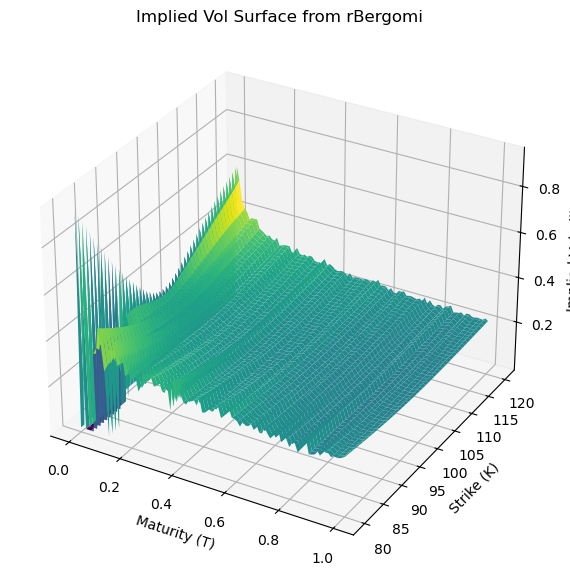

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iv_df = pd.DataFrame(ivs, index=strikes)
X, Y = np.meshgrid(maturities, strikes)
Z = iv_df.values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")
ax.set_xlabel("Maturity (T)")
ax.set_ylabel("Strike (K)")
ax.set_zlabel("Implied Volatility")
plt.title("Implied Vol Surface from rBergomi")
plt.show()